In [1]:
import re
import jieba
import numpy as np
import pandas as pd

from collections import Counter
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.charts import Timeline

In [3]:
lista=np.array(range(1,9))

In [4]:
lista=lista.tolist()

In [ ]:
columns_list=['url','id','name','comment','like_n','create_time','profile_url','description','gender','follow_n','followers_n','blog_n','location']
a= pd.read_csv('../m1.csv',header=None)
a

In [18]:
a.columns=columns_list

In [ ]:
a

In [21]:
weibo_sum=pd.DataFrame(columns=columns_list)
for i in lista:
    a=pd.DataFrame()
    filename='../m'+str(i)+'.csv'
    a=pd.read_csv(filename)
    a.columns=columns_list
    weibo_sum=weibo_sum.append(a,ignore_index=True)
weibo_sum

,url,id,name,comment,like_n,create_time,profile_url,description,gender,follow_n,followers_n,blog_n,location
0,https://m.weibo.cn/detail/4578384941684492,2595996084,七楼的喵姐姐,结婚和离婚都是个人意愿和自由吧，哪里需要这样干预呢？都是成年人，自己的行为自己负责就好了，结...,78287,Fri Dec 04 15:00:24 +0800 2020,https://m.weibo.cn/u/2595996084?uid=2595996084,做个好妈妈，也做更好的自己！,f,241,195,384,山东 威海
1,https://m.weibo.cn/detail/4578384941684492,5127331893,阳台收薄荷,有些人不家暴，但也不工作，还冷暴力，又不离婚，这日子怎么过,63852,Fri Dec 04 14:59:46 +0800 2020,https://m.weibo.cn/u/5127331893?uid=5127331893,人生在世各有各的机缘，各有各的遭遇。,f,240,72,130,其他
2,https://m.weibo.cn/detail/4578384941684492,2990032807,南方有只鲸2048,还有一种方法，就是不结婚,53156,Fri Dec 04 14:59:42 +0800 2020,https://m.weibo.cn/u/2990032807?uid=2990032807,NaN,f,657,309,705,上海 闵行区
3,https://m.weibo.cn/detail/4578384941684492,1864188314,红茶鸳鸯拿铁咖啡,那就等着结婚率持续下降吧，谁怕谁啊,52659,Fri Dec 04 14:55:38 +0800 2020,https://m.weibo.cn/u/1864188314?uid=1864188314,人间忽晚，已是寒冬,f,51,3639,27,福建 泉州
4,https://m.weibo.cn/detail/4578384941684492,6385438240,CultGo,都有离婚想法了，以后的日子也不会理想了！,23317,Fri Dec 04 15:00:04 +0800 2020,https://m.weibo.cn/u/6385438240?uid=6385438240,对话2020，我一定要赢！,m,110,418,37,海外
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,https://m.weibo.cn/detail/4578049314003976,5899844629,雨之侧耳倾听,“我们是被圈养任人宰割的🐷？” 我们是人呐 人,0,Thu Dec 03 14:44:05 +0800 2020,https://m.weibo.cn/u/5899844629?uid=5899844629...,不乱于心 不困于情 不畏将来,m,61,26,64,山东
2482,https://m.weibo.cn/detail/4578049314003976,5213395389,中国人二世,邪教组织必亡于庚子,0,Thu Dec 03 14:17:20 +0800 2020,https://m.weibo.cn/u/5213395389?uid=5213395389...,每一条曾经为虎作伥过的G：记住！你们死不足惜、任何灾难不值得同情，咎由自取！,m,206,4138,980,广东
2483,https://m.weibo.cn/detail/4578049314003976,3624601093,饼干超好吃_,@玫瑰色的你_,0,Thu Dec 03 14:15:30 +0800 2020,https://m.weibo.cn/u/3624601093?uid=3624601093...,甜食爱好者,f,278,151,289,北京 东城区
2484,https://m.weibo.cn/detail/4578049314003976,1244673810,黑仔的铲屎官,那还结个毛！！这是不让大家结都单着吧,2,Thu Dec 03 14:12:51 +0800 2020,https://m.weibo.cn/u/1244673810?uid=1244673810...,双商都不在线,m,191,432,72,北京 东城区


In [24]:
province_distribution = {'四川': 239.0, '浙江': 231.0, '福建': 203.0, '江苏': 185.0, '湖南': 152.0, '山东': 131.0, '安徽': 100.0, '广东': 89.0, '河北': 87.0, '湖北': 84.0, '吉林': 75.0,   
                         '上海': 70.0, '江西': 64.0, '广西': 64.0, '贵州': 64.0, '北京': 63.0, '云南': 53.0, '重庆': 49.0, '河南': 48.0, '陕西': 38.0, '山西': 37.0, '辽宁': 33.0, '新疆': 25.0,  
                         '内蒙古': 23.0, '黑龙江': 20.0, '天津': 19.0, '甘肃': 13.0, '海南': 9.0, '青海': 7.0, '宁夏': 4.0, '西藏': 0.0} 

In [27]:
a=province_distribution.keys()

In [30]:
len(a)

31

In [33]:
loc_list=weibo_sum['location'].tolist()

In [2]:
weibo_sum=pd.read_excel('weibo_sum.xlsx')
weibo_sum.dropna(subset=['comment'],inplace=True)

In [3]:
weibo_sum['loc2'].unique()

array(['山东', '其他', '上海', '福建', '海外', '内蒙古', '北京', '浙江', '广东', '四川', '湖北',
       '陕西', '安徽', '吉林', '辽宁', '广西', '香港', '江苏', '重庆', '河北', '河南', '湖南',
       '江西', '黑龙江', '天津', nan, '海南', '山西', '新疆', '云南', '宁夏', '澳门', '西藏',
       '青海', '贵州', '甘肃', '台湾'], dtype=object)

In [4]:
weibo_sum.columns

Index(['Unnamed: 0', 'url', 'id', 'name', 'comment', 'like_n', 'create_time',
       'profile_url', 'description', 'gender', 'follow_n', 'followers_n',
       'blog_n', 'location', 'loc2'],
      dtype='object')

In [5]:
like_pro=weibo_sum.groupby(['loc2']).mean()
like_pro=like_pro.drop(['Unnamed: 0','id'],axis=1)
like_pro

,like_n,follow_n,followers_n,blog_n
loc2,,,,
上海,1081.700000,646.340000,27470.910000,6476.850000
云南,90.000000,1325.470588,161259.176471,5254.058824
其他,572.287619,360.453333,3339.304762,2602.754286
内蒙古,970.894737,224.210526,45643.210526,1908.210526
北京,391.290566,590.701887,121127.464151,5775.460377
台湾,0.000000,22.000000,0.000000,19.000000
吉林,523.280000,508.800000,57577.600000,6814.000000
四川,89.185484,392.508065,64353.153226,5522.887097
天津,19.825000,885.550000,84238.175000,5107.025000


(array([22.,  3.,  0.,  2.,  1.,  2.,  0.,  0.,  1.,  5.]),
 array([   0.        ,  111.61603774,  223.23207547,  334.84811321,
         446.46415094,  558.08018868,  669.69622642,  781.31226415,
         892.92830189, 1004.54433962, 1116.16037736]),
 <a list of 10 Patch objects>)

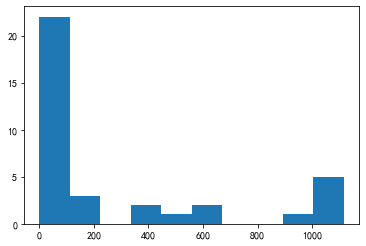

In [6]:
import matplotlib.pyplot as plt
plt.hist(like_pro.like_n)

In [7]:
like_pro.drop(['海外','其他'],inplace=True)

In [8]:
attr = like_pro.index.tolist()

In [9]:
row = like_pro.like_n.tolist()

In [10]:
province=list(like_pro.index)
like_n=list(like_pro.like_n)

In [11]:
total=[list(z) for z in zip(province,like_n)]


In [12]:
list1=[[province[i],like_n[i]] for i in range(len(province))]

In [15]:
map_1=Map(init_opts=opts.InitOpts(width='600px',height='500px'))
map_1.add('Weibo Likes Distribution',list1,maptype='china',is_map_symbol_show=False)
map_1.set_global_opts(
    title_opts=opts.TitleOpts("Weibo Likes Distribution",pos_left='center'),
    visualmap_opts=opts.VisualMapOpts(max_=1200,split_number = 8,is_piecewise=True),
    legend_opts=opts.LegendOpts(is_show=False)
)
map_1.render_notebook()

In [284]:
weibo_sum.drop('Unnamed: 0',axis=1,inplace=True)

In [285]:
stopwords1 = [line.rstrip() for line in open('中国停用词典.txt', 'r', encoding='utf-8')]
stopwords2 = [line.rstrip() for line in open('哈工大停用词典.txt', 'r', encoding='utf-8')]
stopwords3 = [line.rstrip() for line in open('四川大学停用词典.txt', 'r', encoding='utf-8')]
stopwords = stopwords1 + stopwords2 + stopwords3
stopwords = stopwords

In [286]:
filter_pattern = re.compile('[^\u4E00-\u9FD5]+')

In [287]:
len(weibo_sum)

2459

In [288]:
i=1
k=weibo_sum['comment'][i]
k

'有些人不家暴，但也不工作，还冷暴力，又不离婚，这日子怎么过'

In [289]:
chinese_only=filter_pattern.sub('',k)
chinese_only

'有些人不家暴但也不工作还冷暴力又不离婚这日子怎么过'

In [290]:
words_lst = jieba.cut(chinese_only,cut_all=True)

In [291]:
words_lst

<generator object Tokenizer.cut at 0x00000215AC14D820>

In [292]:
meaninful_words = []
for word in words_lst:
    if word not in stopwords:
        meaninful_words.append(word)

In [293]:
meaninful_words

['家暴', '工作', '冷暴力', '暴力', '不离', '离婚', '日子']

In [294]:
def proc_text(raw_line):
    """
        处理每行的文本数据
        返回分词结果
    """
    # 1. 使用正则表达式去除非中文字符
    filter_pattern = re.compile('[^\u4E00-\u9FD5]+')
    
    line1=re.sub("@([\s\S]*?):","", raw_line)
    #line2=re.sub("\[([\S\s]*?)\]","",line1)
    line3=re.sub("@([\s\S]*?)","",line1)
    chinese_only = filter_pattern.sub('', line3)

    # 2. 结巴分词+词性标注
    words_lst = jieba.cut(chinese_only,cut_all=True)

    # 3. 去除停用词
    meaninful_words = []
    for word in words_lst:
        if word not in stopwords:
            meaninful_words.append(word)

    return ' '.join(meaninful_words)

In [298]:
weibo_sum=weibo_sum.reset_index(drop=True)

In [317]:
clean=pd.DataFrame(columns=['comment'])
for i in np.array(range(0,len(weibo_sum),1)):
    cleantext=pd.DataFrame(columns=['comment'])
    cleantext.loc[0,'comment']=proc_text(weibo_sum['comment'][i])
    clean=clean.append(cleantext)

In [326]:
clean

,level_0,index,comment
0,0,0,结婚 离婚 人意 意愿 自由 需要 干预 成年 成年人 行为 负责 了结 结婚 错 离婚 离...
1,1,0,家暴 工作 冷暴力 暴力 不离 离婚 日子
2,2,0,一种 方法 结婚
3,3,0,结婚 率 持续 下降 怕
4,4,0,离婚 想法 以后 日子 会理 理想
...,...,...,...
2454,2454,0,圈养 任人 任人宰割 宰割 呐
2455,2455,0,邪教 邪教组织 组织 必 亡 庚子
2456,2456,0,玫瑰 玫瑰色
2457,2457,0,结 毛 不让 结 单


In [327]:
weibo_sum['s_comment']=clean['comment']

In [328]:
weibo_sum

,url,id,name,comment,like_n,create_time,profile_url,description,gender,follow_n,followers_n,blog_n,location,loc2,s_comment
0,https://m.weibo.cn/detail/4578384941684492,2595996084,七楼的喵姐姐,结婚和离婚都是个人意愿和自由吧，哪里需要这样干预呢？都是成年人，自己的行为自己负责就好了，结...,78287,Fri Dec 04 15:00:24 +0800 2020,https://m.weibo.cn/u/2595996084?uid=2595996084,做个好妈妈，也做更好的自己！,f,241,195,384,山东 威海,山东,结婚 离婚 人意 意愿 自由 需要 干预 成年 成年人 行为 负责 了结 结婚 错 离婚 离...
1,https://m.weibo.cn/detail/4578384941684492,5127331893,阳台收薄荷,有些人不家暴，但也不工作，还冷暴力，又不离婚，这日子怎么过,63852,Fri Dec 04 14:59:46 +0800 2020,https://m.weibo.cn/u/5127331893?uid=5127331893,人生在世各有各的机缘，各有各的遭遇。,f,240,72,130,其他,其他,家暴 工作 冷暴力 暴力 不离 离婚 日子
2,https://m.weibo.cn/detail/4578384941684492,2990032807,南方有只鲸2048,还有一种方法，就是不结婚,53156,Fri Dec 04 14:59:42 +0800 2020,https://m.weibo.cn/u/2990032807?uid=2990032807,NaN,f,657,309,705,上海 闵行区,上海,一种 方法 结婚
3,https://m.weibo.cn/detail/4578384941684492,1864188314,红茶鸳鸯拿铁咖啡,那就等着结婚率持续下降吧，谁怕谁啊,52659,Fri Dec 04 14:55:38 +0800 2020,https://m.weibo.cn/u/1864188314?uid=1864188314,人间忽晚，已是寒冬,f,51,3639,27,福建 泉州,福建,结婚 率 持续 下降 怕
4,https://m.weibo.cn/detail/4578384941684492,6385438240,CultGo,都有离婚想法了，以后的日子也不会理想了！,23317,Fri Dec 04 15:00:04 +0800 2020,https://m.weibo.cn/u/6385438240?uid=6385438240,对话2020，我一定要赢！,m,110,418,37,海外,海外,离婚 想法 以后 日子 会理 理想
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,https://m.weibo.cn/detail/4578049314003976,5899844629,雨之侧耳倾听,“我们是被圈养任人宰割的🐷？” 我们是人呐 人,0,Thu Dec 03 14:44:05 +0800 2020,https://m.weibo.cn/u/5899844629?uid=5899844629...,不乱于心 不困于情 不畏将来,m,61,26,64,山东,山东,圈养 任人 任人宰割 宰割 呐
2455,https://m.weibo.cn/detail/4578049314003976,5213395389,中国人二世,邪教组织必亡于庚子,0,Thu Dec 03 14:17:20 +0800 2020,https://m.weibo.cn/u/5213395389?uid=5213395389...,每一条曾经为虎作伥过的G：记住！你们死不足惜、任何灾难不值得同情，咎由自取！,m,206,4138,980,广东,广东,邪教 邪教组织 组织 必 亡 庚子
2456,https://m.weibo.cn/detail/4578049314003976,3624601093,饼干超好吃_,@玫瑰色的你_,0,Thu Dec 03 14:15:30 +0800 2020,https://m.weibo.cn/u/3624601093?uid=3624601093...,甜食爱好者,f,278,151,289,北京 东城区,北京,玫瑰 玫瑰色
2457,https://m.weibo.cn/detail/4578049314003976,1244673810,黑仔的铲屎官,那还结个毛！！这是不让大家结都单着吧,2,Thu Dec 03 14:12:51 +0800 2020,https://m.weibo.cn/u/1244673810?uid=1244673810...,双商都不在线,m,191,432,72,北京 东城区,北京,结 毛 不让 结 单


In [329]:
weibo_sum.to_excel('s_comment.xlsx')

In [3]:
lista=np.array(range(1,9))

In [4]:
lista=lista.tolist()

In [18]:
a.columns=columns_list

In [330]:
vrweibo_sum=pd.DataFrame(columns=columns_list)
for i in lista:
    a=pd.DataFrame()
    filename='../r'+str(i)+'.csv'
    a=pd.read_csv(filename)
    a.columns=columns_list
    vrweibo_sum=vrweibo_sum.append(a,ignore_index=True)
vrweibo_sum

,url,id,name,comment,like_n,create_time,profile_url,description,gender,follow_n,followers_n,blog_n,location
0,https://m.weibo.cn/detail/4504732830173903,1421732960,曺圭贤是沈昌珉的男人,评论使人清醒哈哈哈 现在这种劝婚软文已经骗不到年轻人贸然结婚了,751,Fri May 15 06:45:36 +0800 2020,https://m.weibo.cn/u/1421732960?uid=1421732960...,H.O.T💟ShinHwa💟FlyToTheSky💟SuperJunior💟 文熙俊💗李在元...,f,1368,8972,97769,NaN
1,https://m.weibo.cn/detail/4504732830173903,5679508036,iBingo,选对日子的同时也要选对的人哦,617,Fri May 15 06:56:27 +0800 2020,https://m.weibo.cn/u/5679508036?uid=5679508036...,微博不知名评论区博主❤,m,1791,563789,20266,NaN
2,https://m.weibo.cn/detail/4504732830173903,5339846216,甜心汤圆sprina-l,选那种日子的十有八九都会离，真正过日子的不会考虑这些乱七八糟玩意的。又不是传统意义上的结婚日子,244,Fri May 15 06:55:21 +0800 2020,https://m.weibo.cn/u/5339846216?uid=5339846216...,走走停停也温暖，简简单单也很美。(๑•ัω•็๑),m,245,356,3850,NaN
3,https://m.weibo.cn/detail/4504732830173903,7291617014,城南月涌,只有我一个人想选13月14号吗,206,Fri May 15 12:28:21 +0800 2020,https://m.weibo.cn/u/7291617014?uid=7291617014...,叫我【月月】就好了呀 欢迎投稿,m,481,1070195,823,NaN
4,https://m.weibo.cn/detail/4504732830173903,3172954100,aiyinsiyu-,有什么意义呢去年离婚率百分之40多,221,Fri May 15 06:38:20 +0800 2020,https://m.weibo.cn/u/3172954100?uid=3172954100...,纵有疾风来，人生不言败,m,237,166,94,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,https://m.weibo.cn/detail/4506623027273220,7294683199,公孙星津,今天是个好日子，恭喜有情人终成眷属！,0,Wed May 20 12:03:38 +0800 2020,https://m.weibo.cn/u/7294683199?uid=7294683199...,学会温暖别人，学会爱自己。,f,365,7,1229,NaN
1615,https://m.weibo.cn/detail/4506623027273220,7308339694,酷暑有语,今天是个特殊的日子，恭喜恭喜,1,Wed May 20 12:02:38 +0800 2020,https://m.weibo.cn/u/7308339694?uid=7308339694...,人品正直心地善良,f,746,557,4345,NaN
1616,https://m.weibo.cn/detail/4506623027273220,6029738828,有一条柯基,笑得这么开心，感觉都很幸福啊！*^_^*,0,Wed May 20 12:00:55 +0800 2020,https://m.weibo.cn/u/6029738828?uid=6029738828...,一个喜欢八卦的女生,f,793,127,3597,NaN
1617,https://m.weibo.cn/detail/4506623027273220,6040910506,wArvin-,不愧是疫往情深。你们都一定要幸福啊！,0,Wed May 20 11:59:34 +0800 2020,https://m.weibo.cn/u/6040910506?uid=6040910506...,我与时光同在,f,317,43,1010,NaN


In [333]:
vrweibo_sum.dropna(subset=['comment'],inplace=True)
vrweibo_sum=vrweibo_sum.reset_index(drop=True)
vrweibo_sum

,url,id,name,comment,like_n,create_time,profile_url,description,gender,follow_n,followers_n,blog_n,location
0,https://m.weibo.cn/detail/4504732830173903,1421732960,曺圭贤是沈昌珉的男人,评论使人清醒哈哈哈 现在这种劝婚软文已经骗不到年轻人贸然结婚了,751,Fri May 15 06:45:36 +0800 2020,https://m.weibo.cn/u/1421732960?uid=1421732960...,H.O.T💟ShinHwa💟FlyToTheSky💟SuperJunior💟 文熙俊💗李在元...,f,1368,8972,97769,NaN
1,https://m.weibo.cn/detail/4504732830173903,5679508036,iBingo,选对日子的同时也要选对的人哦,617,Fri May 15 06:56:27 +0800 2020,https://m.weibo.cn/u/5679508036?uid=5679508036...,微博不知名评论区博主❤,m,1791,563789,20266,NaN
2,https://m.weibo.cn/detail/4504732830173903,5339846216,甜心汤圆sprina-l,选那种日子的十有八九都会离，真正过日子的不会考虑这些乱七八糟玩意的。又不是传统意义上的结婚日子,244,Fri May 15 06:55:21 +0800 2020,https://m.weibo.cn/u/5339846216?uid=5339846216...,走走停停也温暖，简简单单也很美。(๑•ัω•็๑),m,245,356,3850,NaN
3,https://m.weibo.cn/detail/4504732830173903,7291617014,城南月涌,只有我一个人想选13月14号吗,206,Fri May 15 12:28:21 +0800 2020,https://m.weibo.cn/u/7291617014?uid=7291617014...,叫我【月月】就好了呀 欢迎投稿,m,481,1070195,823,NaN
4,https://m.weibo.cn/detail/4504732830173903,3172954100,aiyinsiyu-,有什么意义呢去年离婚率百分之40多,221,Fri May 15 06:38:20 +0800 2020,https://m.weibo.cn/u/3172954100?uid=3172954100...,纵有疾风来，人生不言败,m,237,166,94,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,https://m.weibo.cn/detail/4506623027273220,7294683199,公孙星津,今天是个好日子，恭喜有情人终成眷属！,0,Wed May 20 12:03:38 +0800 2020,https://m.weibo.cn/u/7294683199?uid=7294683199...,学会温暖别人，学会爱自己。,f,365,7,1229,NaN
1595,https://m.weibo.cn/detail/4506623027273220,7308339694,酷暑有语,今天是个特殊的日子，恭喜恭喜,1,Wed May 20 12:02:38 +0800 2020,https://m.weibo.cn/u/7308339694?uid=7308339694...,人品正直心地善良,f,746,557,4345,NaN
1596,https://m.weibo.cn/detail/4506623027273220,6029738828,有一条柯基,笑得这么开心，感觉都很幸福啊！*^_^*,0,Wed May 20 12:00:55 +0800 2020,https://m.weibo.cn/u/6029738828?uid=6029738828...,一个喜欢八卦的女生,f,793,127,3597,NaN
1597,https://m.weibo.cn/detail/4506623027273220,6040910506,wArvin-,不愧是疫往情深。你们都一定要幸福啊！,0,Wed May 20 11:59:34 +0800 2020,https://m.weibo.cn/u/6040910506?uid=6040910506...,我与时光同在,f,317,43,1010,NaN


In [334]:
clean2=pd.DataFrame(columns=['comment'])
for i in np.array(range(0,len(vrweibo_sum),1)):
    cleantext2=pd.DataFrame(columns=['comment'])
    cleantext2.loc[0,'comment']=proc_text(vrweibo_sum['comment'][i])
    clean2=clean2.append(cleantext2)

In [336]:
clean2=clean2.reset_index(drop=True)

In [337]:
vrweibo_sum['s_comment']=clean2['comment']

In [339]:
vrweibo_sum.to_excel('vr_s_comment.xlsx')

In [2]:
weibo_sum=pd.read_excel('s_comment.xlsx')
vrweibo_sum=pd.read_excel('vr_s_comment.xlsx')

In [4]:
import collections #词频统计库
word_counts=collections.Counter(' '.join(weibo_sum['s_comment'].tolist())) #对分词做词频统计

TypeError: sequence item 30: expected str instance, float found

In [5]:
wwww=vrweibo_sum['s_comment'].dropna().tolist()

wordlist2=list()

wwww

t=0
for i in wwww:
    if t == 0:
        wordlist2=i.split(' ')
        t=t+1
    else:
        wordlist2=wordlist2+i.split(' ')
        t=t+1

word_counts2=collections.Counter(wordlist2)

In [6]:
wwww=weibo_sum['s_comment'].dropna().tolist()

wordlist=list()

wwww

t=0
for i in wwww:
    if t == 0:
        wordlist=i.split(' ')
        t=t+1
    else:
        wordlist=wordlist+i.split(' ')
        t=t+1

word_counts=collections.Counter(wordlist)

In [464]:
import wordcloud #词云展示库
from PIL import Image,ImageDraw,ImageFont#图像处理库
import matplotlib.pyplot as plt

In [465]:
mask= plt.imread('spilt_heart.png')

In [428]:
import wordcloud #词云展示库
from PIL import Image,ImageDraw,ImageFont#图像处理库
import matplotlib.pyplot as plt
mask= plt.imread('spilt_heart.png'') #这个jpg文件就是你想要展示词云的背景图片
wc=wordcloud.WordCloud(
    scale=20,
    background_color='white',
    font_path='C:\Windows\Fonts\simhei.ttf', #设置字体格式以显示中文
    mask=mask,
    max_words=200, #设置所展示词组数量的最大值
    max_font_size=100, #设置字体的最大值
    random_state=30
)
wc.generate_from_frequencies(word_counts) #从字典生成词云
image_colors=wordcloud.ImageColorGenerator(mask) #获取背景图颜色信息
wc.recolor(color_func=image_colors) #将词云颜色设置为背景图颜色
plt.imshow(wc,interpolation='bilinear') #显示词云
plt.axis('off') #关闭坐标轴

SyntaxError: EOL while scanning string literal (<ipython-input-428-6401c1819028>, line 4)

In [429]:
#导入词云库
from wordcloud import WordCloud
#导入图像处理库
import PIL.Image as image
#导入数据处理库
import numpy as np
#导入结巴分词库
import jieba
mask = np.array(image.open("spilt_heart.png"))
wordcloud = WordCloud(
# 遮罩层,除白色背景外,其余图层全部绘制（之前设置的宽高无效）
mask=mask,
#默认黑色背景,更改为白色
background_color='#FFFFFF',
#按照比例扩大或缩小画布
scale=30,
# 若想生成中文字体,需添加中文字体路径
font_path="C:\Windows\Fonts\simhei.ttf"
).generate(word_counts)
#返回对象
image_produce = wordcloud.to_image()
#保存图片
wordcloud.to_file("new_wordcloud.jpg")
#显示图像
image_produce.show()

TypeError: expected string or bytes-like object

In [422]:
mask = np.array(image.open("split_heart.jpg"))

In [434]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import  jieba
def GetWordCloud():
   path_img = "split_heart.jpg"
   background_image = np.array(Image.open(path_img))
   # 结巴分词，生成字符串，如果不通过分词，无法直接生成正确的中文词云,感兴趣的朋友可以去查一下，有多种分词模式
   #Python join() 方法用于将序列中的元素以指定的字符连接生成一个新的字符串。
   cut_text = word_counts

   wordcloud = WordCloud(
       # 设置字体，不然会出现口字乱码，文字的路径是电脑的字体一般路径，可以换成别的
       font_path="C:/Windows/Fonts/simfang.ttf",
       background_color="white",
       # mask参数=图片背景，必须要写上，另外有mask参数再设定宽高是无效的
       mask=background_image).generate_from_frequencies(word_counts)
    
   # 生成颜色值
   image_colors = ImageColorGenerator(background_image)
   # 下面代码表示显示图片
   plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
   plt.axis("off")
   plt.show()

if __name__ == '__main__':
   GetWordCloud()

ValueError: ImageColorGenerator is smaller than the canvas

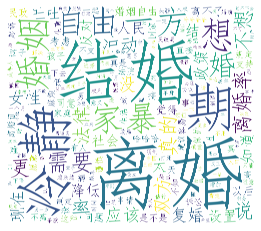

In [561]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  #绘制图像的模块
import  jieba                    #jieba分词

path_img = "split_heart.jpg"
background_image = np.array(Image.open(path_img))
# 结巴分词，生成字符串，wordcloud无法直接生成正确的中文词云

wordcloud = WordCloud(
    scale=20,
   #设置字体，不然会出现口字乱码，文字的路径是电脑的字体一般路径，可以换成别的
   font_path="C:/Windows/Fonts/simfang.ttf",
   #设置了背景，宽高
   background_color="white",width=1000,height=880).generate_from_frequencies(word_counts)

image_colors = ImageColorGenerator(background_image)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('could1.png',dpi=300)
plt.show()


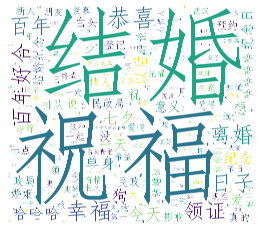

In [440]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  #绘制图像的模块
import  jieba                    #jieba分词


# 结巴分词，生成字符串，wordcloud无法直接生成正确的中文词云

wordcloud = WordCloud(
    scale=20,
   #设置字体，不然会出现口字乱码，文字的路径是电脑的字体一般路径，可以换成别的
   font_path="C:/Windows/Fonts/simfang.ttf",
   #设置了背景，宽高
   background_color="white",width=1000,height=880).generate_from_frequencies(word_counts2)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('could2.png',dpi=300)
plt.show()


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
rx=vrweibo_sum['s_comment'].dropna().tolist()

In [9]:
x=weibo_sum['s_comment'].dropna().tolist()

In [10]:
VTx = TfidfVectorizer()
resultx = VTx.fit_transform(x)

In [11]:
resultx

<2372x4932 sparse matrix of type '<class 'numpy.float64'>'
	with 17853 stored elements in Compressed Sparse Row format>

In [12]:
print(resultx.toarray())
print(VTx.get_feature_names())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['一丁', '一丁点', '一上', '一下', '一下子', '一不小心', '一世', '一两', '一两个', '一个个', '一个天', '一个家', '一个月', '一举', '一了百了', '一代', '一件', '一份', '一位', '一出', '一刀', '一刀切', '一分', '一分一秒', '一分钟', '一刻', '一劳永逸', '一半', '一厢', '一厢情愿', '一双', '一口', '一口气', '一句', '一号', '一同', '一名', '一回', '一场', '一块', '一堆', '一大', '一大堆', '一大批', '一天', '一天天', '一套', '一定', '一家', '一家人', '一家子', '一寸', '一对', '一小', '一小部分', '一层', '一层层', '一帆风顺', '一帮', '一年', '一年制', '一座', '一开', '一张', '一意', '一意孤行', '一手', '一批', '一把', '一拖', '一拖再拖', '一招', '一文', '一新', '一方', '一时', '一时冲动', '一时间', '一月', '一本', '一条', '一条条', '一来一去', '一根', '一桩', '一棍子', '一棍子打死', '一次', '一步', '一步步', '一段', '一流', '一点', '一点儿', '一点点', '一片', '一生', '一生一世', '一百', '一百年', '一盒', '一瞬', '一瞬间', '一石多鸟', '一票', '一票否决', '一种', '一秒', '一秒钟', '一程', '一系', '一系列', '一纸', '一线', '一群', '一股', '一胎', '一脸', '一致', '一般而言', '一视同仁', '一言', '一言堂', '一败涂地', '一起', '一趟', '一路', '一身', '一辈', '一辈子

In [13]:
word_counts

Counter({'结婚': 891,
         '离婚': 1141,
         '人意': 2,
         '意愿': 8,
         '自由': 164,
         '需要': 125,
         '干预': 6,
         '成年': 30,
         '成年人': 27,
         '行为': 13,
         '负责': 21,
         '了结': 16,
         '错': 9,
         '复婚': 76,
         '反思': 13,
         '当初': 7,
         '头脑': 27,
         '热': 12,
         '家暴': 174,
         '工作': 13,
         '冷暴力': 4,
         '暴力': 11,
         '不离': 41,
         '日子': 19,
         '一种': 9,
         '方法': 5,
         '率': 104,
         '持续': 2,
         '下降': 28,
         '怕': 20,
         '想法': 14,
         '以后': 60,
         '会理': 2,
         '理想': 1,
         '每天': 6,
         '天一': 7,
         '恐': 25,
         '婚': 132,
         '技巧': 6,
         '妈妈': 5,
         '再也': 3,
         '不用': 26,
         '担心': 4,
         '冲动': 82,
         '感觉': 29,
         '听取': 2,
         '一方': 167,
         '方人': 1,
         '真': 43,
         '想': 185,
         '盼': 1,
         '不想': 100,
         '判离': 3,
         '

In [14]:
word_counts.most_common()[0:15]

[('离婚', 1141),
 ('结婚', 891),
 ('冷静', 575),
 ('期', 453),
 ('婚姻', 199),
 ('想', 185),
 ('家暴', 174),
 ('一方', 167),
 ('自由', 164),
 ('婚', 132),
 ('需要', 125),
 ('离婚率', 105),
 ('率', 104),
 ('不想', 100),
 ('更', 97)]

In [15]:
VTrx = TfidfVectorizer()
resultrx = VTrx.fit_transform(rx)

In [16]:
resultrx.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
len(rx)

1545

In [18]:
len(x)

2372

In [19]:
yx=['1']*len(x)
yrx=['0']*len(rx)

In [20]:
x2=x+rx
y=yx+yrx

In [21]:
len(x2)

3917

In [22]:
len(y)

3917

In [23]:
VTx = TfidfVectorizer()
resultx = VTx.fit_transform(x2)
X=resultx.toarray()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
len(X)

3917

In [26]:
len(y)

3917

In [27]:
from sklearn import svm
classifier=svm.SVC(C=1,kernel='rbf',gamma=10) # ovr:一对多策略
classifier.fit(X_train,y_train)

SVC(C=1, gamma=10)

In [28]:

print("训练集：",classifier.score(X_train,y_train))
print("测试集：",classifier.score(X_test,y_test))

训练集： 0.9768471229145387
测试集： 0.7010204081632653


In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [30]:
y_pred=classifier.predict(X_test)

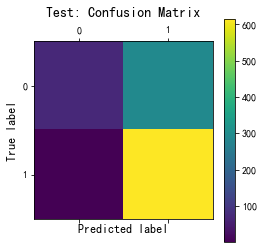

In [31]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(confusion_matrix)
plt.title('Test: Confusion Matrix', fontsize=14, fontweight='bold',y=1.1)
plt.ylabel('True label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
plt.colorbar()
plt.savefig('confusion matrix_test',dpi=300)
plt.show()

In [527]:
y_pred=y_pred.tolist()

In [ ]:
y_pred

In [513]:
confusion_matrix

array([[1128,  104],
       [   3, 1808]], dtype=int64)

In [ ]:
y_test

In [552]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.20      0.33       367
           1       0.69      0.99      0.81       648

    accuracy                           0.71      1015
   macro avg       0.82      0.60      0.57      1015
weighted avg       0.78      0.71      0.64      1015



In [556]:
from sklearn import metrics
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95      1232
           1       0.95      1.00      0.97      1811

    accuracy                           0.96      3043
   macro avg       0.97      0.96      0.96      3043
weighted avg       0.97      0.96      0.96      3043



In [539]:
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc='lower right')
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

AttributeError: predict_proba is not available when  probability=False

In [540]:
classifier.predict_proba(X_test)

AttributeError: predict_proba is not available when  probability=False

NameError: name 'tfidf' is not defined